In [1]:
import numpy as np
import keras
from keras import backend as k
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense,Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

Using TensorFlow backend.


In [2]:
train_path = 'dogs_and_cats/training_set/'
valid_path = 'dogs_and_cats/validation_set/'
test_path = 'dogs_and_cats/test/'

In [3]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224),classes=['cat','dog'], batch_size = 10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path,target_size=(224,224),classes = ['cat','dog'],batch_size =10)
test_batches = ImageDataGenerator().flow_from_directory(test_path,target_size=(224,224),classes=['cat','dog'],batch_size=10)

Found 4002 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [4]:
# plotting images with labels
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1]!=3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims)%2==0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows,cols,i+1)
        sp.axis('off')
        if titles is not None:
            sp.set_title(titles[i],fontsize=16)
        plt.imshow(ims[i],interpolation = None if interp else 'none')
            

In [5]:
imgs,labels = next(train_batches)

D:\Anaconda\Anaconda3\envs\keras_tf\lib\site-packages\matplotlib\text.py:1190: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


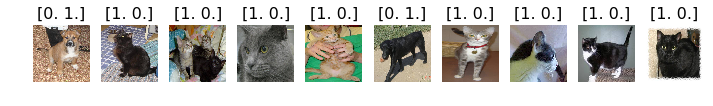

In [6]:
plots(imgs,titles=labels)

# Build and train CNN

In [7]:
model = Sequential([Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)),Flatten(),Dense(2,activation='softmax')])

In [8]:
model.compile(Adam(lr=0.001),loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
flatten_1 (Flatten)          (None, 1577088)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 3154178   
Total params: 3,155,074
Trainable params: 3,155,074
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.fit_generator(train_batches,steps_per_epoch=20,validation_data=valid_batches,validation_steps=7,epochs=5,verbose=1)

Epoch 1/5
20/20 [==============================] - 27s 1s/step - loss: 7.6561 - acc: 0.5250 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/5
20/20 [==============================] - 11s 564ms/step - loss: 7.5755 - acc: 0.5300 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/5
20/20 [==============================] - 11s 569ms/step - loss: 8.9455 - acc: 0.4450 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 4/5
20/20 [==============================] - 12s 587ms/step - loss: 8.3814 - acc: 0.4800 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 5/5
20/20 [==============================] - 12s 577ms/step - loss: 9.0261 - acc: 0.4400 - val_loss: 8.0590 - val_acc: 0.5000


D:\Anaconda\Anaconda3\envs\keras_tf\lib\site-packages\matplotlib\text.py:1190: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


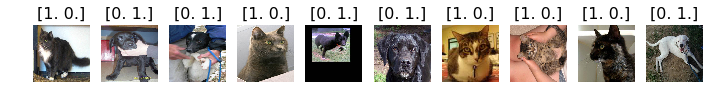

In [11]:
#we have not got a good results here we will do some fine-tuning of some parameters to improve the results
#Before that lets do the prediction on our test data and see the confusion matrix

test_imgs,test_labels = next(test_batches)
plots(test_imgs,titles=test_labels)

In [12]:
test_labels = test_labels[:,0]
test_labels


array([1., 0., 0., 1., 0., 0., 1., 1., 1., 0.], dtype=float32)

In [13]:
Prediction = model.predict_generator(test_batches,steps=1,verbose=0)

In [14]:
Prediction

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [15]:
cm = confusion_matrix(test_labels,Prediction[:,0])

In [16]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[0 5]
 [0 5]]


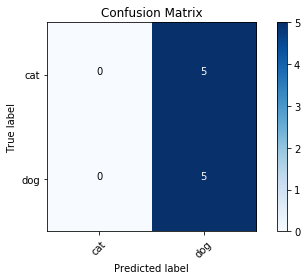

In [17]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm,cm_plot_labels,title = 'Confusion Matrix')

In [18]:
#As we can see from confusion matrix i.e, only 50% accuracy we got
# we will do now some fine-tuning to improve the accuracy


# Building Fine-Tuned VGG16

In [21]:
from keras.applications import vgg16
from keras.models import Model
import keras
import numpy as np
from keras import backend as k
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
vgg16_model = keras.applications.vgg16.VGG16()


In [22]:
vgg16_model.summary()
type(vgg16_model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

keras.engine.training.Model

In [23]:
model = Sequential()
for layer in vgg16_model.layers:
    model.add(layer)

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [25]:
#As we have issue with the model.layers.pop() command to remove the last layer we now try to use this below code to remove last layer
model = vgg16.VGG16(weights='imagenet', include_top=True)

model.input

model.summary(line_length=150)
model.layers.pop()

model.summary(line_length=150)

inp = model.input
out =model.layers[-1].output

model2 = Model(inp, out)  # create a new model which doesn't have the last one layers in VGG16
model2.summary(line_length=150)

______________________________________________________________________________________________________________________________________________________
Layer (type)                                                       Output Shape                                                Param #                
input_3 (InputLayer)                                               (None, 224, 224, 3)                                         0                      
______________________________________________________________________________________________________________________________________________________
block1_conv1 (Conv2D)                                              (None, 224, 224, 64)                                        1792                   
______________________________________________________________________________________________________________________________________________________
block1_conv2 (Conv2D)                                              (None, 224, 224, 64)       

In [27]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [41]:
#model.save('Image_classifier.h5')

In [28]:
for layer in model.layers:
    #This is used to freeze this layer means it will not learn any feature
    layer.trainable = False

In [29]:
from keras.models import load_model
prev_model = load_model('Image_classifier.h5')
new_model = Sequential()
new_model.add(prev_model)
new_model.add(Dense(2,activation='softmax'))

D:\Anaconda\Anaconda3\envs\keras_tf\lib\site-packages\keras\utils\conv_utils.py:82: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.copy(kernel[slices])
D:\Anaconda\Anaconda3\envs\keras_tf\lib\site-packages\keras\engine\saving.py:269: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [30]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1000)              138357544 
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 2002      
Total params: 138,359,546
Trainable params: 2,002
Non-trainable params: 138,357,544
_________________________________________________________________


# Training the Fine-tuned VGG16

In [31]:
new_model.compile(Adam(lr=0.001),loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [32]:
new_model.fit_generator(train_batches,steps_per_epoch=20,validation_data=valid_batches,validation_steps=100,epochs=5,verbose=1)

Epoch 1/5
20/20 [==============================] - 250s 12s/step - loss: 0.6997 - acc: 0.3150 - val_loss: 0.6937 - val_acc: 0.4980
Epoch 2/5
13/20 [==================>...........] - ETA: 7s - loss: 0.6904 - acc: 0.5538

KeyboardInterrupt: 

In [62]:
new_model.save('cats_dogs_classifier.h5')

In [63]:
new_model.save_weights('cats_dogs_weights.h5')

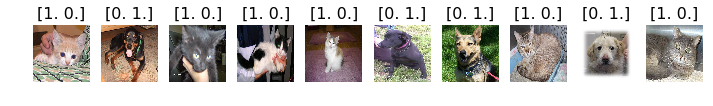

In [88]:
new_test_imgs,new_test_labels = next(test_batches)
plots(new_test_imgs,titles=new_test_labels)

In [89]:
new_test_labels = new_test_labels[:,0]
new_test_labels

array([1., 0., 1., 1., 1., 0., 0., 1., 0., 1.], dtype=float32)

In [90]:
#Prediction
prediction = new_model.predict_generator(test_batches,steps=1,verbose=0)

In [91]:
np.round(prediction)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [92]:

cm = confusion_matrix(test_labels,np.round(prediction[:,0]))

In [94]:
cm_plot_labels = ['cat','dog']
#plot_confusion_matrix(cm,cm_plot_labels,title = 'Confusion Matrix for VGG16')

In [102]:
from keras.callbacks import History 
# list all data in history
#print(history.history.keys())
history = History()
print(hist.history)

NameError: name 'hist' is not defined